# Evaluating Linear regression

## Challenge: Validating a linear regression

by: Melissa N 



In [1]:
import math
import statsmodels.formula.api as smf


import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau
from sklearn import linear_model
%matplotlib inline
#pd.options.display.float_format = '{:.3f}'.format
from IPython.display import display
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")



#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.tools import FigureFactory as FF
import scipy

This file cotains information about crime data in New York State in 2013, provided by the FBI: UCR. 
It is given about different types of crimes that are committed in different cities in the state of New York.  

### Cleaning Data    

We will also look at rows or column that are empty and remove them from our data.   
we will look for outliers and remove them from our data.   

In [2]:
# Assign spreadsheet filename to `file`
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
# Load spreadsheet
xl = pd.ExcelFile(file)
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('13tbl8ny')
display(df1.head())

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
#Adjust df1 to exclude 1st 3 rows.
df = df1[3:len(df1)]
#grab the first row for the header set the header row as the df header
df.columns = df.iloc[0]

In [4]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [5]:
## Make Columns easier to read 

df.columns = ["City", "Population","Violent_crime","Murder","Rape_revised","Rape_legacy"
                 ,"Robbery","Aggravated_assault","Property_crime","Burglary","Larceny_theft","Motor_vehicle_theft","Arson3"]

In [6]:
df = df[1:]
df.index = range(0,len(df))

In [7]:
# checking the last 3 rows 
display(df[-3:])

,City,Population,Violent_crime,Murder,Rape_revised,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Removing the columns with NAN
df.drop(['Rape_revised','Arson3'], inplace=True, axis=1)
#Adjust df to exclude the last 3 rows
# dropping the row
df = df.iloc[:347]

In [9]:
# Check variable types.
df.dtypes

City                   object
Population             object
Violent_crime          object
Murder                 object
Rape_legacy            object
Robbery                object
Aggravated_assault     object
Property_crime         object
Burglary               object
Larceny_theft          object
Motor_vehicle_theft    object
dtype: object

In [10]:
# convert columns to numeric.
df.loc[:,'Property_crime'] = pd.to_numeric(df.loc[:,'Property_crime'])
df.loc[:,'Population'] = pd.to_numeric(df.loc[:,'Population'])
df.loc[:,'Violent_crime'] = pd.to_numeric(df.loc[:,'Violent_crime'])
df.loc[:,'Murder'] = pd.to_numeric(df.loc[:,'Murder'])
df.loc[:,'Rape_legacy'] = pd.to_numeric(df.loc[:,'Rape_legacy'])
df.loc[:,'Aggravated_assault'] = pd.to_numeric(df.loc[:,'Aggravated_assault'])
df.loc[:,'Burglary'] = pd.to_numeric(df.loc[:,'Burglary'])
df.loc[:,'Larceny_theft'] = pd.to_numeric(df.loc[:,'Larceny_theft'])
df.loc[:,'Motor_vehicle_theft'] = pd.to_numeric(df.loc[:,'Motor_vehicle_theft'])
df.loc[:,'Robbery'] = pd.to_numeric(df.loc[:,'Robbery'])

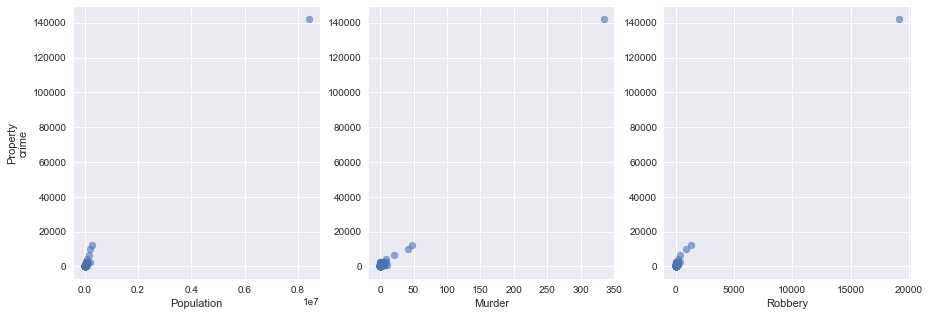

In [11]:
# Look at the scatter plot for Population, Murder and Robbery


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property\ncrime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

Looking at this scatter plot, we can see that there is a lot of outliers. 
One of them occurs where Property and crime is 140,000. So we will try to remove that and other outliers that we may see. 

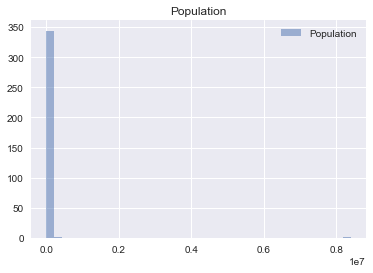

In [12]:
# Look at the histogram of populations"

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

This histogram doesn't tell us anything. 
Hopefully will be helpful or better once we have remove the outliers. 

In [13]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df.loc[((df['Murder'] > 0) & (df['Population'] > 100000))] )

print(len(df[df['Murder'] > 0]))
print(len(df[df['Murder'] == 0]))

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


49
298


In [14]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Property_crime'] > 3000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394


In [15]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


In [16]:
## Drop the rows that seem to contain outliers for Property and crime 
#df.drop(df.index[[7,3,35,216,272,310,346]], inplace=True, axis=0)
## Drop the rows that seem to contain outliers for Property and crime 
df.drop(df.index[[216]], inplace=True, axis=0)

display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


We will just remove New York City, because it is a highly populated city and thus create the outlier inn our data.

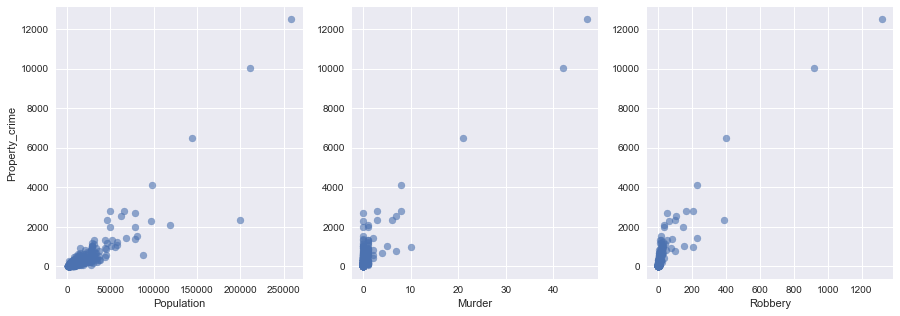

In [17]:
# Look at the scatter plot for Population, Murder and Robbery with cleaned data 

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property_crime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

The scatter plots looks better.     
We can clearly see that there is a lot of information for City with Property Crime less that 1000 and Population around 50,000.    
For Murder and nonnegligent manslaugther most of them are in place where there is 2 or less occurences.   
For Robbery it looks like most of them occure where there is a 50 or less occurences.  

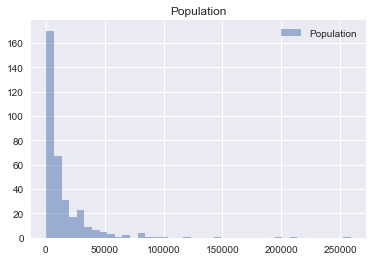

In [18]:
# Look at the histogram of population with clean data 

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

In [19]:
# Making dummies.
# Also creating a data frame to hold our features.
features_13 = df
display(features_13.head())

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [20]:
### Create the new feature, (Population)^2
features_13['Population_sqrd'] = df['Population'] **2
#where values greater than 0 are coded 1, and values equal to 0 are coded 0.

features_13['Robbery_cat'] = np.where(df['Robbery']>0, 1, 0)
features_13['Murder_cat'] = np.where(df['Murder']>0, 1, 0)


In [21]:
df_f = features_13[['City', 'Property_crime','Population', 'Population_sqrd','Murder',
                 'Murder_cat','Robbery','Robbery_cat']]

display(df_f.head())


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_f['Property_crime']
X = df_f[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,City,Property_crime,Population,Population_sqrd,Murder,Murder_cat,Robbery,Robbery_cat
0,Adams Village,12,1861,3463321,0,0,0,0
1,Addison Town and Village,24,2577,6640929,0,0,0,0
2,Akron Village,16,2846,8099716,0,0,0,0
3,Albany,4090,97956,9595377936,8,1,227,1
4,Albion Village,223,6388,40806544,0,0,4,1



Coefficients: 
 [  1.31329923e-02   1.14179192e-07   1.90100476e+02   9.34195483e+01]

Intercept: 
 -17.5788971595

R-squared:
0.844869713518


The R squared value is good. It is not too high meaning that the model is not overfitting.  
As for the coefficients, the coefficient for population squared is very small, which means this can be removed when performing the linear regression.   

## Verify Assumptions

1- linear relationship

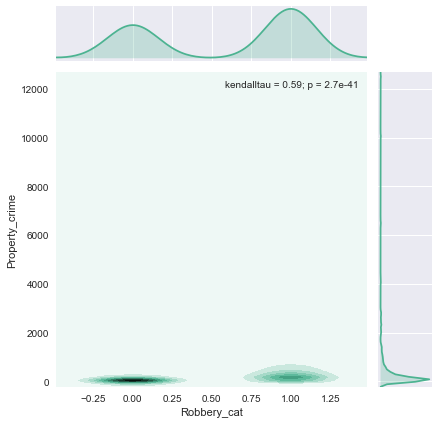

In [22]:
sns.jointplot(X['Robbery_cat'], Y, kind="kde", stat_func=kendalltau, color="#4CB391")

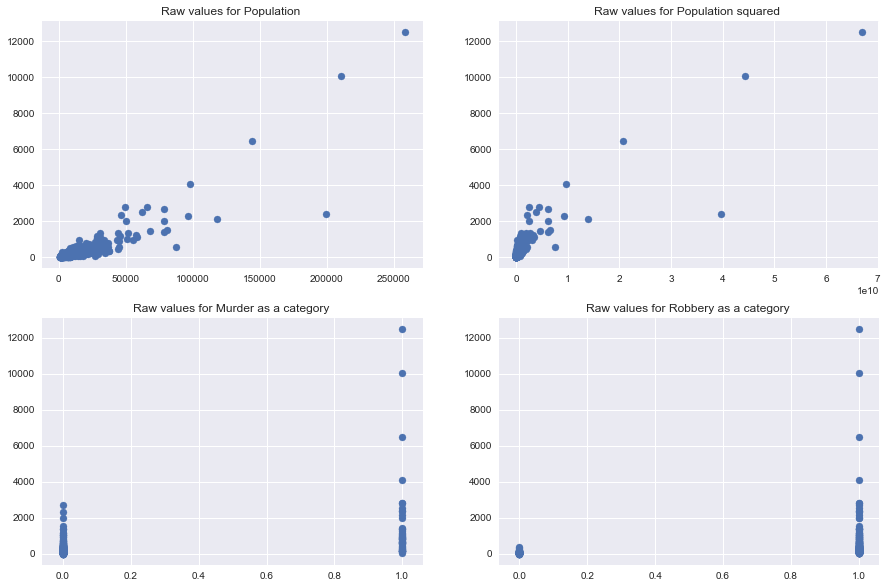

In [23]:


# Plot the data as-is.
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(X['Population'],Y)
plt.title('Raw values for Population ')

plt.subplot(2, 2, 2)
plt.scatter(X['Population_sqrd'], Y)
plt.title('Raw values for Population squared ')

plt.subplot(2, 2, 3)
plt.scatter(X['Murder_cat'], Y)
plt.title('Raw values for Murder as a category ')
plt.subplot(2, 2, 4)


plt.scatter(X['Robbery_cat'], Y)
plt.title('Raw values for Robbery as a category ')
plt.show()

We see a clear linear relationship between Population, Murder, Robbery and the outcome Property and crime.     
While the relation between Population_sqrd and Property and crime is not linear.    

2- multivariate normality

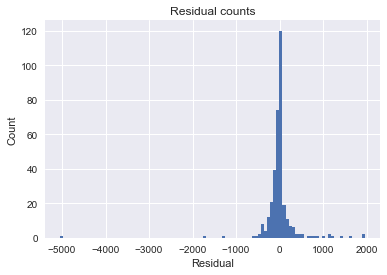

In [24]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df_f['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual, bins = 100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [25]:
# Transformation causes error. Check for zeroes in property_crime (dependent variable).
display(df_f[df_f['Property_crime'] == 0])

,City,Property_crime,Population,Population_sqrd,Murder,Murder_cat,Robbery,Robbery_cat
186,Manchester Village,0,1688,2849344,0,0,0,0
208,New Berlin Town,0,1622,2630884,0,0,0,0
256,Port Byron Village,0,1274,1623076,0,0,0,0
287,Schoharie Village,0,872,760384,0,0,0,0
295,Shortsville Village,0,1437,2064969,0,0,0,0
319,Tuxedo Park Village,0,615,378225,0,0,0,0


In [26]:
# Drop rows with zeroes.
df_f1 = df_f[df_f['Property_crime'] != 0]

In [27]:
# Rerun the model with log transformation on the dependent variable since removed outlier

Y1 = np.log(df_f1['Property_crime'])
X1 = df_f1[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]
regr.fit(X1, Y1)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X1, Y1))


Coefficients: 
 [  5.78216223e-05  -1.77679033e-10   2.19977450e-01   1.35598728e+00]

Intercept: 
 3.14982706241

R-squared:
0.727347998784


R squared is not bad but 0.81 is better.       
And it makes sense that the coefficients of Population squared and Population got much smaller.     
So the log transformation is not improving our linear regression.     

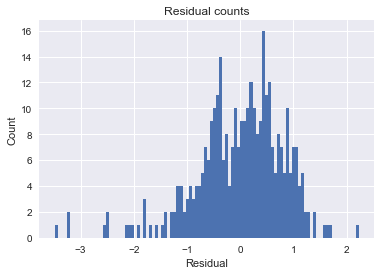

In [28]:
# Verify residual distribution.

# Extract predicted values.
predicted1 = regr.predict(X1)
actual1 = Y1
# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

plt.hist(residual1, bins = 100)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

3- homoscedasticity

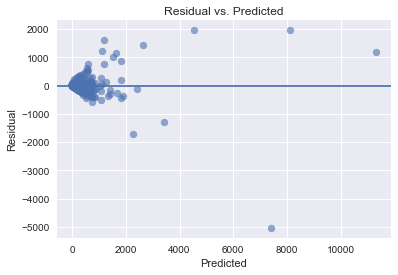

In [29]:
plt.scatter(predicted, residual, alpha=0.6 )
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Here we can't really see the error between the residual and the predicted.   

The general scatter is lower but we have a different amount of error is higher as the Property crime value get higher.

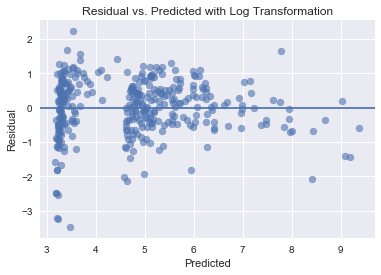

In [30]:
# Log transformation with outliers removed.

plt.scatter(predicted1, residual1, alpha=0.6)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with Log Transformation')
plt.show()

We have more error. The error is regular by what outcome value we have  gets higher. 

In [31]:
#X_f = X[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]
#X_f = [[X, Y]]
#type(X_f)
#display(Y)

X['Property_crime'] = Y 


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


4-  low multicollinearity

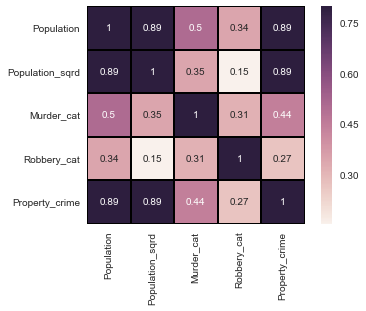

In [32]:

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

Looking at this correlation matrix,      
we see that the correlation between Population and Population_sqrd is 0.89. This makes sense since the two feaures are related.      

The correlation between Population and Murder_cat is 0.5      
The correlation between Population and Robbery_cat is 0.34   

The correlation between Population_sqrd and Murder_cat is 0.35.      
The correlation between Population_sqrd and Robbery_cat is 0.15.     

The correlation between Population and Property crime is 0.89.      
The correlation between Population_sqrd and Property crime is 0.89.   
The correlation between Murder_cat and and Property crime is 0.44.          
The correlation between Robbery_cat and Property crime is 0.27. 


From this we can conclude that the features of importance are Population, Population_sqrd and Murder_cat.   

In [33]:

X1['Property_crime'] = Y1 


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


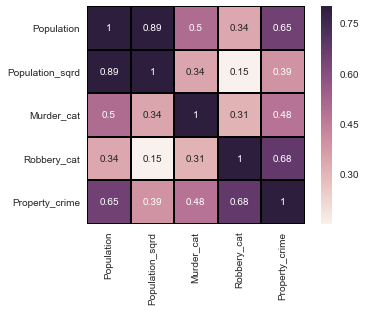

In [34]:
correlation_matrix1 = X1.corr()
sns.heatmap(correlation_matrix1,vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

Looking at this correlation matrix,      
we see that the correlation between Population and Population_sqrd is 0.89. This makes sense since the two feaures are related.      

The correlation between Population and Murder_cat is 0.5      
The correlation between Population and Robbery_cat is 0.34   

The correlation between Population_sqrd and Murder_cat is 0.31.      
The correlation between Population_sqrd and Robbery_cat is 0.15  


The correlation between Population and Property crime is 0.65.      
The correlation between Population_sqrd and Property crime is 0.39.   
The correlation between Murder_cat and and Property crime is 0.48.          
The correlation between Robbery_cat and Property crime is 0.68. 


From this we can conclude that the features of importance are Population, Robbery_cat and Murder_cat.

## Evaluating Linear Regression

In [35]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property_crime ~ Population+Population_sqrd+Murder_cat+Robbery_cat'

# Fit the model to our data using the formula.
lm_13 = smf.ols(formula=linear_formula, data=features_13).fit()

# Print the summary table.
display(lm_13.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Property_crime   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     464.3
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          1.50e-136
Time:                        19:04:35   Log-Likelihood:                -2570.3
No. Observations:                 346   AIC:                             5151.
Df Residuals:                     341   BIC:                             5170.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -17.5789     36.038     -0.488      0.626     -88.463      53.306
Population          0.0131      0.002      6.032      0.000       0.009       0.017
Population_sqrd  1.142e-07   1.04e-08     10.946      0.000    9.37e-08    1.35e-07
Murder_cat        190.1005     76.853      2.474      0.014      38.935     341.266
Robbery_cat        93.4195     51.457      1.815      0.070      -7.794     194.633
==============================================================================
Omnibus:                      394.547   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74221.763
Skew:                          -4.513   Prob(JB):                         0.00
Kurtosis:                      74.182   Cond. No.                     1.81e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
lm_13.params

Intercept         -1.757890e+01
Population         1.313299e-02
Population_sqrd    1.141792e-07
Murder_cat         1.901005e+02
Robbery_cat        9.341955e+01
dtype: float64

In [37]:
lm_13.pvalues

Intercept          6.260121e-01
Population         4.210589e-09
Population_sqrd    4.256835e-24
Murder_cat         1.386373e-02
Robbery_cat        7.032791e-02
dtype: float64

In [38]:
lm_13.rsquared

0.84486971351755302

# Confidence intervals

In [39]:
display(lm_13.conf_int())

,0,1
Intercept,-8.846335e+01,5.330556e+01
Population,8.850671e-03,1.741531e-02
Population_sqrd,9.366092e-08,1.346975e-07
Murder_cat,3.893525e+01,3.412657e+02
Robbery_cat,-7.793791e+00,1.946329e+02


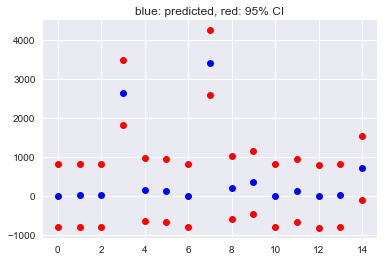

In [40]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm_13)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm_13.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [41]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
target = features_13['Property_crime']
data = features_13[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]
regr.fit(data, target).score(data, target)

0.84486971351755313

## Cross Validation 

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([ 0.76272942,  0.93681646,  0.30994559,  0.82748174,  0.76037272,
        0.79392819,  0.55267779,  0.90255191,  0.85024029, -1.59833033])

It is not good.    
It is very uncertain on its own data. 

This may mean that we need another relationship between the features and outcomes.
So I need to improve my model by checking the relationship between the different features and the outcome variable.

## 2014 New York Crime

### Cleaning Data    

We will also look at rows or column that are empty and remove them from our data.   
we will look for outliers and remove them from our data.    
Similarly as we did for the data for New York 2013

In [43]:
file = 'Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls'
# Load spreadsheet
x2 = pd.ExcelFile(file)
# Load a sheet into a DataFrame by name: df1
df2 = x2.parse('14tbl08ny')
#Adjust df1 to exclude 1st 3 rows.
df_14 = df2[3:len(df2)]

display(df_14.head())

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0
5,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0
7,Akron Village,2842,1,0,NaN,0,0,1,17,0,17,0,0


In [44]:
#grab the first row for the header set the header row as the df header
df_14.columns = df_14.iloc[0]
df_14 = df_14[1:]
df_14.index = range(0,len(df_14))

In [45]:
df_14.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [46]:
## Make Columns easier to read 

df_14.columns = ["City", "Population","Violent_crime","Murder","Rape_revised","Rape_legacy"
                 ,"Robbery","Aggravated_assault","Property_crime","Burglary","Larceny_theft","Motor_vehicle_theft","Arson3"]

In [47]:
# Removing the columns with NAN
df_14.drop(['Rape_legacy','Arson3'], inplace=True, axis=1)
#Adjust df to exclude the last 3 rows
# dropping the row
df_14 = df_14.iloc[:347]

display(df_14.head())

,City,Population,Violent_crime,Murder,Rape_revised,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1851,0,0,NaN,0,0,11,1,10,0
1,Addison Town and Village,2568,2,0,NaN,1,1,49,1,47,1
2,Afton Village4,820,0,0,0,0,0,1,0,1,0
3,Akron Village,2842,1,0,NaN,0,1,17,0,17,0
4,Albany4,98595,802,8,54,237,503,3888,683,3083,122


In [48]:
# convert columns to numeric.
df_14.loc[:,'Property_crime'] = pd.to_numeric(df_14.loc[:,'Property_crime'])
df_14.loc[:,'Population'] = pd.to_numeric(df_14.loc[:,'Population'])
df_14.loc[:,'Violent_crime'] = pd.to_numeric(df_14.loc[:,'Violent_crime'])
df_14.loc[:,'Murder'] = pd.to_numeric(df_14.loc[:,'Murder'])
df_14.loc[:,'Rape_revised'] = pd.to_numeric(df_14.loc[:,'Rape_revised'])
df_14.loc[:,'Aggravated_assault'] = pd.to_numeric(df_14.loc[:,'Aggravated_assault'])
df_14.loc[:,'Burglary'] = pd.to_numeric(df_14.loc[:,'Burglary'])
df_14.loc[:,'Larceny_theft'] = pd.to_numeric(df_14.loc[:,'Larceny_theft'])
df_14.loc[:,'Motor_vehicle_theft'] = pd.to_numeric(df_14.loc[:,'Motor_vehicle_theft'])
df_14.loc[:,'Robbery'] = pd.to_numeric(df_14.loc[:,'Robbery'])

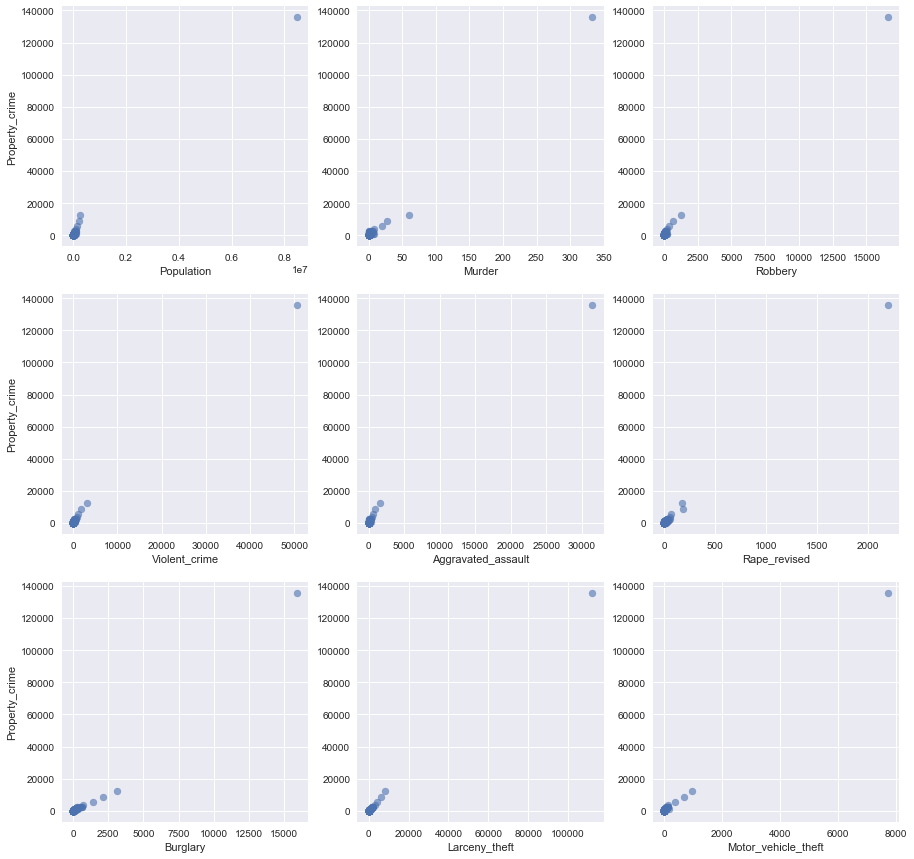

In [49]:
# Look at the scatter plot for Population, Murder,  Robbery, violent crime etc....


plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.scatter(df_14['Population'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 2)

plt.scatter(df_14['Murder'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(3, 3, 3)

plt.scatter(df_14['Robbery'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.subplot(3, 3, 4)
plt.scatter(df_14['Violent_crime'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Violent_crime')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 5)

plt.scatter(df_14['Aggravated_assault'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Aggravated_assault')

plt.subplot(3, 3, 6)

plt.scatter(df_14['Rape_revised'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Rape_revised')


plt.subplot(3, 3, 7)
plt.scatter(df_14['Burglary'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Burglary')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 8)

plt.scatter(df_14['Larceny_theft'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Larceny_theft')

plt.subplot(3, 3, 9)

plt.scatter(df_14['Motor_vehicle_theft'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Motor_vehicle_theft')


plt.show()

Looking at this scatter plot, we can see that there is a lot of outliers. 
One of them occurs where Property and crime is 140,000. So we will try to remove that and other outliers that we may see. 

In [51]:
## From our study we see that there is an outlier when Population is bigger than 1 million
display(df_14[df_14['Property_crime'] > 3000])

,City,Population,Violent_crime,Murder,Rape_revised,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
4,Albany4,98595,802,8,54.0,237,503,3888,683,3083,122
38,Buffalo4,258419,3174,60,174.0,1277,1663,12449,3119,8362,968
227,New York4,8473938,50564,333,2190.0,16581,31460,135747,15916,112107,7724
283,Rochester4,210347,1765,27,190.0,698,850,8856,2125,6058,673
326,Syracuse4,144534,1164,20,70.0,406,668,5755,1404,3986,365


In [52]:
## Remove Outlier
df_14.drop(df_14.index[[227]], inplace=True, axis=0)


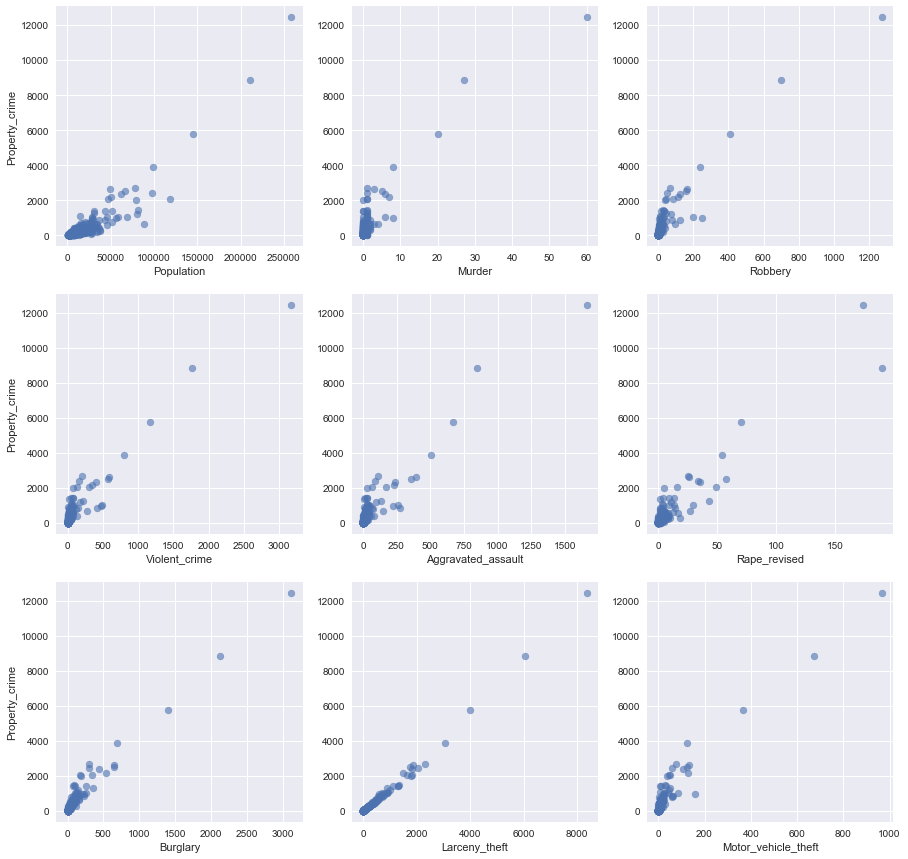

In [53]:
# Look at the scatter plot for Population, Murder,  Robbery, violent crime etc....


plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.scatter(df_14['Population'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 2)

plt.scatter(df_14['Murder'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(3, 3, 3)

plt.scatter(df_14['Robbery'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.subplot(3, 3, 4)
plt.scatter(df_14['Violent_crime'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Violent_crime')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 5)

plt.scatter(df_14['Aggravated_assault'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Aggravated_assault')

plt.subplot(3, 3, 6)

plt.scatter(df_14['Rape_revised'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Rape_revised')


plt.subplot(3, 3, 7)
plt.scatter(df_14['Burglary'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Burglary')
plt.ylabel('Property_crime')

plt.subplot(3, 3, 8)

plt.scatter(df_14['Larceny_theft'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Larceny_theft')

plt.subplot(3, 3, 9)

plt.scatter(df_14['Motor_vehicle_theft'], df_14['Property_crime'], alpha=0.6)
plt.xlabel('Motor_vehicle_theft')


plt.show()

In [56]:
# Making dummies.
# Also creating a data frame to hold our features.
features_14 = df_14

### Create the new feature, (Population)^2
features_14['Population_sqrd'] = df_14['Population'] **2
#where values greater than 0 are coded 1, and values equal to 0 are coded 0.
features_14['Property_crime'] = features_14['Property_crime']

features_14['Robbery_cat'] = np.where(df_14['Robbery']>0, 1, 0)
features_14['Murder_cat'] = np.where(df_14['Murder']>0, 1, 0)

In [57]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula1 = 'Property_crime ~ Population+Population_sqrd+Murder_cat+Robbery_cat'

# Fit the model to our data using the formula.
lm_14 = smf.ols(formula=linear_formula1, data=features_14).fit()


# Print the summary table.
display(lm_14.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Property_crime   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1208.
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          6.88e-200
Time:                        19:13:34   Log-Likelihood:                -2402.5
No. Observations:                 346   AIC:                             4815.
Df Residuals:                     341   BIC:                             4834.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.3622     20.603     -0.697      0.486     -54.886      26.162
Population          0.0102      0.001      6.936      0.000       0.007       0.013
Population_sqrd  1.426e-07   6.91e-09     20.638      0.000    1.29e-07    1.56e-07
Murder_cat        271.4819     49.707      5.462      0.000     173.711     369.253
Robbery_cat        77.0639     32.080      2.402      0.017      13.964     140.163
==============================================================================
Omnibus:                       88.154   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2458.591
Skew:                           0.268   Prob(JB):                         0.00
Kurtosis:                      16.048   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
lm_14.params

Intercept         -1.436222e+01
Population         1.021481e-02
Population_sqrd    1.426233e-07
Murder_cat         2.714819e+02
Robbery_cat        7.706387e+01
dtype: float64

In [59]:
lm_14.pvalues

Intercept          4.862088e-01
Population         2.031885e-11
Population_sqrd    5.564363e-62
Murder_cat         9.109519e-08
Robbery_cat        1.682880e-02
dtype: float64

In [60]:
lm_14.rsquared

0.93408874107267903

The R-squared value is too big. This will overfit.

# Confidence intervals

In [61]:
display(lm_14.conf_int())

,0,1
Intercept,-5.488622e+01,2.616178e+01
Population,7.318100e-03,1.311152e-02
Population_sqrd,1.290304e-07,1.562162e-07
Murder_cat,1.737108e+02,3.692531e+02
Robbery_cat,1.396449e+01,1.401632e+02


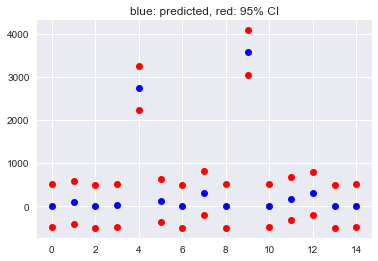

In [62]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm_14)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm_14.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

## Hold Out Groups 

In [63]:
# Instantiate and fit our model.
regr1 = linear_model.LinearRegression()
target1 = features_14['Property_crime']
data1 = features_14[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]

In [64]:
print('Testing on 2013 Training Set: ' + str(regr1.fit(data, target).score(data, target)))
print('Testing 2014 Test Set: ' + str(regr1.fit(data, target).score(data1, target1)))

Testing on 2013 Training Set: 0.844869713518
Testing 2014 Test Set: 0.926679656191


It is not overfitting because the R squared for the test set is higher than the one for the  traning set.   
The model predicts new data well.   

## Cross Validation 

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data1, target1, cv=10)

array([ 0.77231666,  0.98993571,  0.67454637,  0.87551757,  0.66812547,
        0.33679925,  0.5569116 ,  0.44200842,  0.95523753,  0.90794073])

## Iteration 0  

__target1__ = features_14['Property_crime']

__data1__ = features_14[['Population', 'Population_sqrd','Murder_cat','Robbery_cat']]

__ Hold Out Groups__   

Testing on 2013 Training Set: 0.844869713518   
Testing 2014 Test Set: 0.926679656191  

It is not overfitting because the R squared for the test set is higher than the one for the  traning set.   
The model predicts new data well.   

__Cross Validation__

array([ 0.77231666,  0.98993571,  0.67454637,  0.87551757,  0.66812547,
        0.33679925,  0.5569116 ,  0.44200842,  0.95523753,  0.90794073])



## Iteration 1  

__target1__ = features_14['Property_crime']    
__data1__ = features_14[['Population','Murder_cat','Robbery_cat']] 

__ Hold Out Groups__   

Testing on 2013 Training Set: 0.739290344733   
Testing 2014 Test Set: 0.81535991109

It is not overfitting because the R squared for the test set is higher than the one for the  traning set.   
The model predicts new data well.   

__Cross Validation__

array([ 0.70306305,  0.8586633 ,  0.15363681,  0.57671984,  0.24244054,
       -1.37830802,  0.31066584,  0.25047153,  0.89050258,  0.91478761])
       
       
       
## Iteration 2  

__target1__ = features_14['Property_crime']    
__data1__ = features_14[['Population','Murder','Robbery', 'Larceny_theft']] 

__ Hold Out Groups__   

Testing on 2013 Training Set: 0.996795313128   
Testing 2014 Test Set: 0.997914067296     

It is not overfitting because the R squared for the test set is equal to the one for the  traning set.   
The model predicts new data too well.  

__Cross Validation__

array([ 0.99658482,  0.99702286,  0.99122403,  0.99661778,  0.97559122,
        0.99506925,  0.98989679,  0.98521953,  0.99644314,  0.99694841])   
        
        
## Iteration 3  

__target1__ = features_14['Property_crime']    
__data1__ = features_14[['Population','Robbery','Aggravated_assault', 'Larceny_theft']] 

__ Hold Out Groups__   

Testing on 2013 Training Set: 0.996599741754    
Testing 2014 Test Set: 0.997924842005    

It is not overfitting because the R squared for the test set is equal to the one for the  traning set.   
The model predicts new data too well.    

__Cross Validation__

 array([ 0.99202973,  0.99900174,  0.99174274,  0.99811227,  0.97673863,
        0.99559335,  0.98952062,  0.98465589,  0.9965212 ,  0.99712411])
        
## Iteration 4 

__target1__ = features_14['Property_crime']    
__data1__ = features_14[['Population']]

__ Hold Out Groups__   

Testing on 2013 Training Set: 0.737487846158   
Testing 2014 Test Set: 0.81595174012    

It is not overfitting because the R squared for the test set is higher than the one for the  traning set.   
The model predicts new data well.     

__Cross Validation__

 array([ 0.71689521,  0.85551085,  0.38088376,  0.54547435,  0.29232842,
       -1.22964847,  0.32443521,  0.14733338,  0.88350407,  0.90903005])     
       
       
## Iteration 5  

__target1__ = features_14['Property_crime']    
__data1__ = features_14[] 

__What to do__

We will do feature engineering.    
Will get rid of population and create new features by dividing the remaining features by population.    
This will give us the information per capita.      
Roberry seems to be a log.    
Don't remove Buffallo and other citiies that have more than 100,000 in population.   
Maybe reinsert NY and see what we get.   
